##### Importing libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

##### Loading Dataset

In [34]:
titanic_data = pd.read_csv(r"C:\Users\niran\Downloads\Titanic-Dataset.csv")

##### Preprocessing

In [35]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


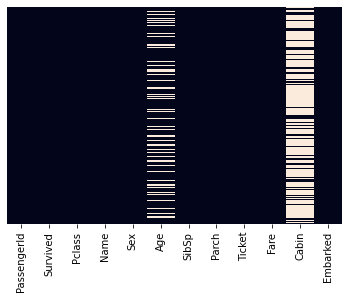

In [38]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)
print(titanic_data.isnull().sum())

In [39]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [40]:
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

##### Visualisation and EDA

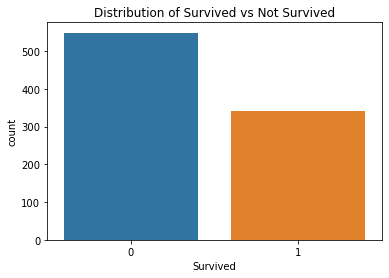

In [41]:
# Distribution of Survived vs Not Survived
sns.countplot(x='Survived', data=titanic_data)
plt.title('Distribution of Survived vs Not Survived')
plt.show()

Text(0.5, 1.0, 'Distribution of Survived vs Not Survived categorised by sex')

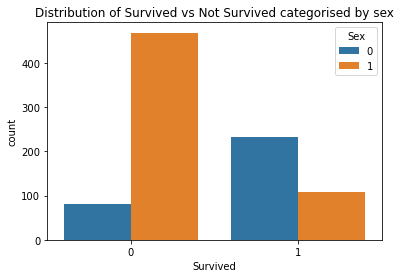

In [44]:
# Distribution of Survived vs Not Survived categorised by sex
sns.countplot(x="Survived",hue="Sex",data=titanic_data)
plt.title('Distribution of Survived vs Not Survived categorised by sex')

Text(0.5, 1.0, 'Distribution of Survived vs Not Survived categorised by Pclass')

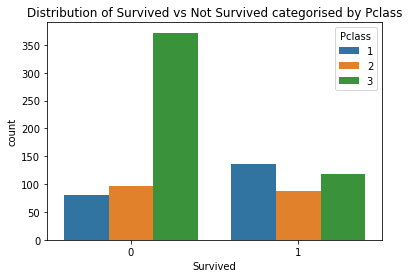

In [47]:
# Distribution of Survived vs Not Survived categorised by Pclass
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)
plt.title('Distribution of Survived vs Not Survived categorised by Pclass')

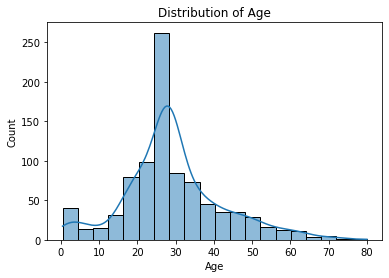

In [43]:
# Distribution of Age
sns.histplot(titanic_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

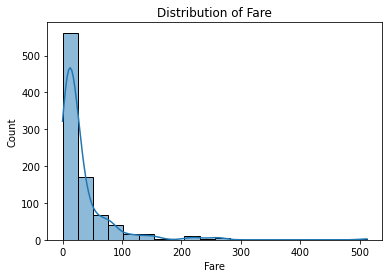

In [48]:
# Distribution of Fare
sns.histplot(titanic_data['Fare'], bins=20, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

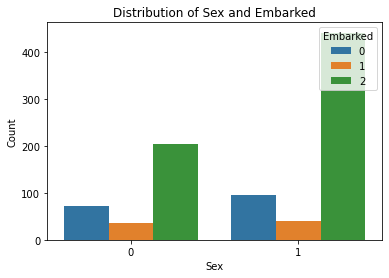

In [50]:
# Distribution of Sex and Embarked
sns.countplot(x='Sex', hue='Embarked', data=titanic_data)
plt.title('Distribution of Sex and Embarked')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Embarked', loc='upper right')
plt.show()

##### Splitting the dataset into training and testing sets

In [51]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Model Training (random forest classifier)

In [67]:
rf_classifier = RandomForestClassifier(random_state=42)

In [68]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
rf_pred = rf_classifier.predict(X_test)

##### Results

In [70]:
rf_accuracy = accuracy_score(y_test, rf_pred)

In [71]:
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8212290502793296


In [79]:
print(classification_report(y_test, ensemble_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.84      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



##### Top 3 important features

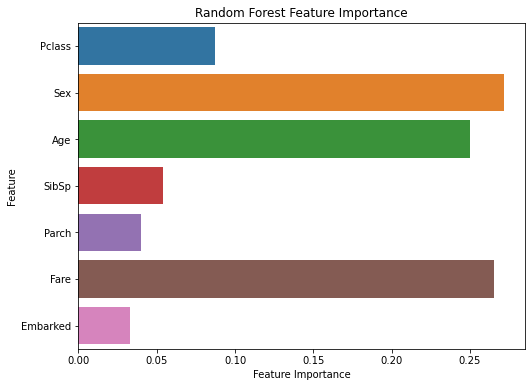

In [77]:
plt.figure(figsize=(8, 6))
sns.barplot(x=rf_classifier.feature_importances_, y=X.columns)
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [78]:
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df.head(3)
print("Top 3 Important Features:")
print(top_features)


Top 3 Important Features:
  Feature  Importance
1     Sex    0.271410
5    Fare    0.265010
2     Age    0.249995
